# Train a VGG on MNIST dataset

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm

In [5]:
device_name = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_name)
print(f"Device:{device_name}")

Device:cuda


In [17]:
class SmallVGG(nn.Module):
    def __init__(self):
        super(SmallVGG, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, padding=1), nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # 14x14

            nn.Conv2d(16, 32, kernel_size=3, padding=1), nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # 7x7

            nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # 3x3
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(32*3*3, 256), nn.ReLU(),
            nn.Linear(256, 10)  # Output Layer: 10 classes
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1) # Flatten tensor
        x = self.fc_layers(x)
        return x

## Prepare Datasets

In [18]:
# Defined composed transformation on the dataset
transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Initialize Model, Loss Function and Optimizer
model = SmallVGG().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Train and Evaluate

In [22]:
def train_and_evaluate(model,
                       train_loader,
                       test_loader, 
                       criterion, 
                       optimizer, 
                       num_epochs=100):

    # Record losses to plot
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * len(images)
        train_losses.append(running_loss / len(train_loader))

        # Evaluate on test set
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item() * len(images)

        test_losses.append(test_loss / len(test_loader))
        print(f"Epoch[{epoch+1}/{num_epochs}, Train Loss:{train_losses[-1]:.4f}, Test Loss:{test_losses[-1]:.4f}")

    return train_losses, test_losses

In [23]:
num_epochs = 20
train_losses, test_losses = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs)

100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 23.90it/s]


Epoch[1/20, Train Loss:36.2943, Test Loss:9.1432


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 23.68it/s]


Epoch[2/20, Train Loss:8.0915, Test Loss:5.3832


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 23.82it/s]


Epoch[3/20, Train Loss:5.5270, Test Loss:4.2761


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 23.72it/s]


Epoch[4/20, Train Loss:4.3243, Test Loss:4.1856


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 24.61it/s]


Epoch[5/20, Train Loss:3.5566, Test Loss:3.8797


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:18<00:00, 24.98it/s]


Epoch[6/20, Train Loss:3.1175, Test Loss:4.2280


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:18<00:00, 25.44it/s]


Epoch[7/20, Train Loss:2.6472, Test Loss:3.5115


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 23.46it/s]


Epoch[8/20, Train Loss:2.1011, Test Loss:4.8168


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 23.50it/s]


Epoch[9/20, Train Loss:1.9912, Test Loss:3.6292


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 23.62it/s]


Epoch[10/20, Train Loss:1.8905, Test Loss:3.0222


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 23.60it/s]


Epoch[11/20, Train Loss:1.6861, Test Loss:4.8750


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 24.07it/s]


Epoch[12/20, Train Loss:1.4032, Test Loss:5.4678


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 24.28it/s]


Epoch[13/20, Train Loss:1.6684, Test Loss:3.7368


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:18<00:00, 24.82it/s]


Epoch[14/20, Train Loss:1.3882, Test Loss:3.5021


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 24.18it/s]


Epoch[15/20, Train Loss:1.1176, Test Loss:3.6386


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 24.05it/s]


Epoch[16/20, Train Loss:1.0991, Test Loss:3.5877


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:18<00:00, 24.73it/s]


Epoch[17/20, Train Loss:1.1092, Test Loss:6.3189


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 24.14it/s]


Epoch[18/20, Train Loss:0.9793, Test Loss:3.7140


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 23.87it/s]


Epoch[19/20, Train Loss:0.9093, Test Loss:4.7622


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:19<00:00, 24.15it/s]


Epoch[20/20, Train Loss:1.0800, Test Loss:4.2345


## Plot loss curves

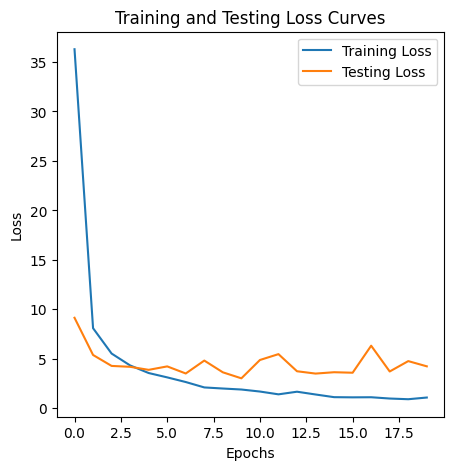

In [24]:
plt.figure(figsize=(5,5))
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Testing Loss Curves")
plt.legend()
plt.show()